In [40]:
import numpy as np
import cv2
import os

from scipy import ndimage

%pylab inline

output_dir = os.path.join('.')

Populating the interactive namespace from numpy and matplotlib


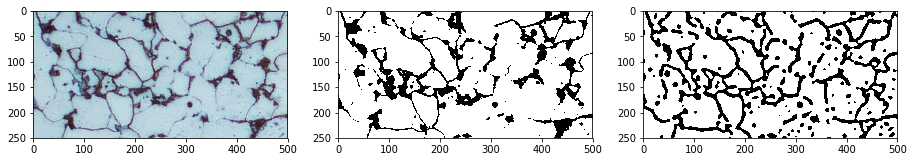

In [98]:
img = cv2.imread('200x_1010_T.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,15)
th2 = ndimage.gaussian_filter(th2,3)
th2 = cv2.adaptiveThreshold(th2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,5)

#---------------------------
plt.subplot(131)
plt.imshow(img[:250,:500],cmap='gray')

plt.subplot(132)
plt.imshow(thresh[:250,:500],cmap='gray')

plt.subplot(133)
plt.imshow(th2[:250,:500],cmap='gray')

plt.subplots_adjust(left=0.5, bottom=0.5, right = 2.5, top=5)

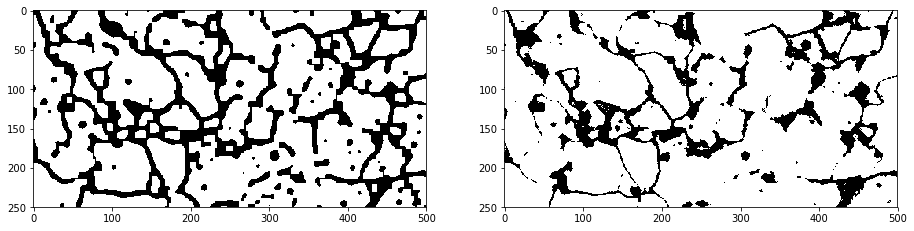

In [91]:
# noise removal
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(th2,cv2.MORPH_CLOSE,kernel, iterations = 1)
opening = cv2.morphologyEx(th2,cv2.MORPH_OPEN,kernel, iterations = 3)
#opening = thresh

# sure background area
#sure_bg = cv2.dilate(opening,kernel,iterations=1)
sure_bg = opening

# Finding sure foreground area
#dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
#ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = cv2.erode(opening,kernel,iterations=1)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#--------------------------

plt.subplot(121)
plt.imshow(opening[:250,:500],cmap='gray')

plt.subplot(122)
plt.imshow(thresh[:250,:500],cmap='gray')

plt.subplots_adjust(left=0.5, bottom=0.5, right = 2.5, top=5)

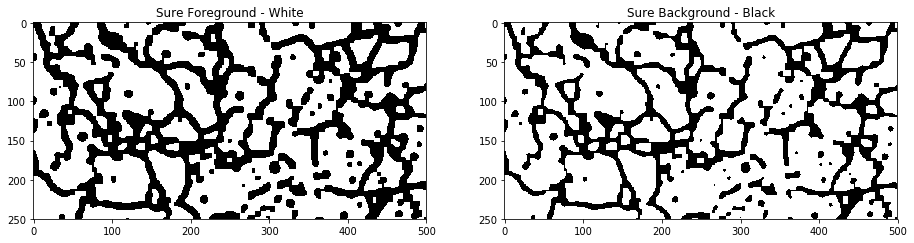

In [92]:
plt.subplot(121)
plt.imshow(sure_fg[:250,:500],cmap='gray')
plt.title('Sure Foreground - White')

plt.subplot(122)
plt.imshow(sure_bg[:250,:500],cmap='gray')
plt.title('Sure Background - Black')

plt.subplots_adjust(left=0.5, bottom=0.5, right = 2.5, top=5)

In [93]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [94]:
output = img.copy()

markers = cv2.watershed(img,markers)
output[markers == -1] = [255,0,0]

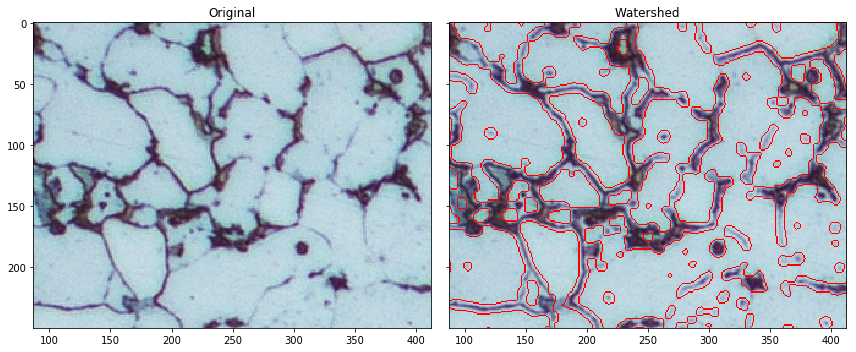

In [104]:
f, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].imshow(img[:250,:500])
ax[0].set_title('Original')

ax[1].imshow(output[:250,:500])
ax[1].set_title('Watershed')

plt.tight_layout()


pylab.savefig(os.path.join(output_dir,'prueba.png'), dpi=600)